In [6]:
import numpy as np
import ROOT

file_eff_MuID = ROOT.TFile.Open( "efficiencies/muon/RunBCDEF_SF_MuID.root", "READ" )

In [2]:
file_eff_MuID.ls()

TFile**		efficiencies/muon/RunBCDEF_SF_MuID.root	
 TFile*		efficiencies/muon/RunBCDEF_SF_MuID.root	
  KEY: TH2D	NUM_LooseID_DEN_genTracks_pt_abseta;1	NUM_LooseID_DEN_genTracks_pt_abseta
  KEY: TH2D	NUM_TightID_DEN_genTracks_pt_abseta;1	NUM_TightID_DEN_genTracks_pt_abseta
  KEY: TH2D	NUM_MediumID_DEN_genTracks_pt_abseta;1	NUM_MediumID_DEN_genTracks_pt_abseta
  KEY: TH2D	NUM_HighPtID_DEN_genTracks_pair_newTuneP_probe_pt_abseta;1	NUM_HighPtID_DEN_genTracks_pair_newTuneP_probe_pt_abseta
  KEY: TH2D	NUM_TrkHighPtID_DEN_genTracks_pair_newTuneP_probe_pt_abseta;1	NUM_TrkHighPtID_DEN_genTracks_pair_newTuneP_probe_pt_abseta
  KEY: TH2D	NUM_SoftID_DEN_genTracks_pt_abseta;1	NUM_SoftID_DEN_genTracks_pt_abseta
  KEY: TH2D	NUM_MediumPromptID_DEN_genTracks_pt_abseta;1	NUM_MediumPromptID_DEN_genTracks_pt_abseta


In [8]:
h_eff_MuID_2D = file_eff_MuID.Get( "NUM_TightID_DEN_genTracks_pt_abseta" )

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas1


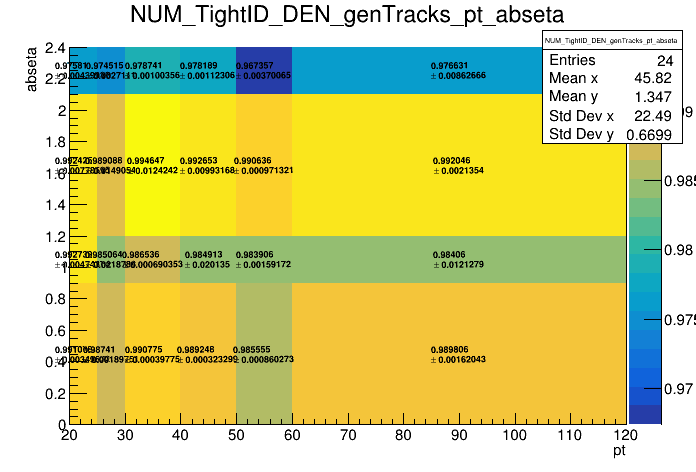

In [5]:
canvas1 = ROOT.TCanvas( "canvas1" )
h_eff_MuID_2D.Draw()
canvas1.Draw()

In [21]:
class MuonScaleFactor:
    def __init__( self, histos ):
        self.h2D_MuID = histos[ "MuID" ]
    def __call__( self, pt, eta ):
        sf_ = 1.
        unc_ = 0.
        if pt < 120.:
            bin2D_ = self.h2D_MuID.FindBin( pt, np.abs( eta) )
            sf_ = self.h2D_MuID.GetBinContent( bin2D_ )
            unc_ = self.h2D_MuID.GetBinError( bin2D_ )
        return ( sf_, unc_ )

In [22]:
muon_scale_factor_ = MuonScaleFactor( histos = { "MuID": h_eff_MuID_2D } )
muon_scale_factor_( 70., 1.2 )

(0.9920464322143979, 0.0021353964567237746)